<h1>Data Analysis of Iceland Accident Data</h1><br>
<h3>By Barbora Doslikova</h3><br>
<em>My first attempt at analysis of data downloaded from the internet.</em>

Data source: http://www.statice.is/?PageID=1282&src=https://rannsokn.hagstofa.is/pxen/Dialog/varval.asp?ma=HEI12001%26ti=Accidents+reported+to+the+State+Social+Security+Institute+1964-2012++%26path=../Database/heilbrigdismal/slys/%26lang=1%26units=Number 

Source: State Social Security Institute and Icelandic Health Insurance.<br>
Latest update: 2014-01-10.<br>
Unit: Number.<br>
Reference time: 1964 - 2012.<br>
Year; Total accidents; Total fatal accidents.<br>

<h1>Part A.</h1>
<h1>Has The Number Of Accidents In Iceland Changed Over Time?</h1><br>

<h3><strong>Questions:</strong></h3><br>
1. Has the number of total accidents in Iceland changed over time?<br>
2. Has the number of total fatal accidents in Iceland changed over time?<br>

<h3><strong>Read Data</strong></h3>

In [1]:
import pandas as pd

def read_file(name='healthIceland.csv'):
    # open data direcly as pandas.core.frame.DataFrame
    df = pd.read_csv(name)
    # assign the proper column name 'Year' to the 1st column 
    df.columns = ['Year', 'Total accidents', 'Total fatal accidents']
    return df

data = read_file()

print(data.head())
print(data.tail())

# number of rows (49) by columns (3)
print(data.shape)

   Year  Total accidents  Total fatal accidents
0  1964             1090                     27
1  1965             1089                     24
2  1966             1150                     31
3  1967             1173                     38
4  1968             1366                     34
    Year  Total accidents  Total fatal accidents
44  2008             2160                      5
45  2009             1980                      2
46  2010             1842                      4
47  2011             1934                      1
48  2012             2004                      3
(49, 3)


In [2]:
# calculates the 4th column
data['Fatal:total*100'] = data['Total fatal accidents'] / data['Total accidents'] * 100

print(data.head())
print(data.tail())
print(data.shape)

   Year  Total accidents  Total fatal accidents  Fatal:total*100
0  1964             1090                     27         2.477064
1  1965             1089                     24         2.203857
2  1966             1150                     31         2.695652
3  1967             1173                     38         3.239557
4  1968             1366                     34         2.489019
    Year  Total accidents  Total fatal accidents  Fatal:total*100
44  2008             2160                      5         0.231481
45  2009             1980                      2         0.101010
46  2010             1842                      4         0.217155
47  2011             1934                      1         0.051706
48  2012             2004                      3         0.149701
(49, 4)


<h3><strong>Visualise Changes Over Time</strong></h3>

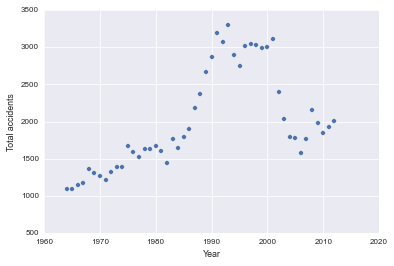

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline  

# No. of total accidents has dropped since 1990s.
data.plot(kind='scatter', x='Year', y='Total accidents')

The number of total accidents (numbers are per 100,000 population) seems to be increasing.

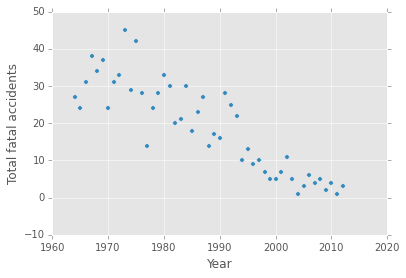

In [10]:
# No. of total FATAL accidents has dropped since 1990s.
data.plot(kind='scatter', x='Year', y='Total fatal accidents')

The number of total fatal accidents (numbers are per 100,000 population) seems to be decreasing.

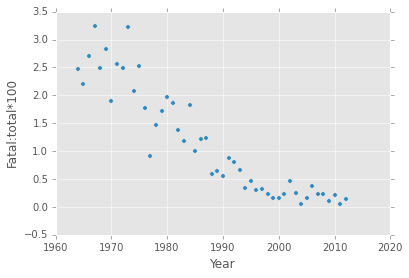

In [13]:
# The & of total FATAL to total accidents has dropped since 1990s.
data.plot(kind='scatter', x='Year', y='Fatal:total*100')

The number of total fatal accidents as a percentage of the number of total accidents seems to be decreasing.

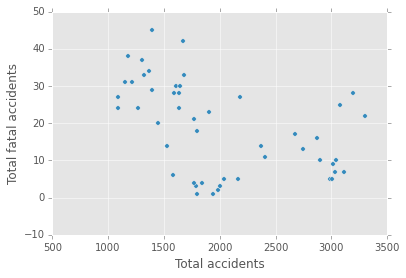

In [12]:
# Has the no of fatal accidents decreased independently of no of total accidents?
data.plot(kind='scatter', x='Total accidents', y='Total fatal accidents')

The number of total fatal accidents seems to be negatively correlated with the number of total accidents.
I.e. the fewer total accidents per year, the fewer total fatal accidents per year.<br>
(numbers are per 100,000 population)

<h3><strong>Are The Changes Over Time Significant?</strong></h3>

<h4><strong>A. Are the data parametric?</strong></h4>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D36A438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D88DF28>]], dtype=object)

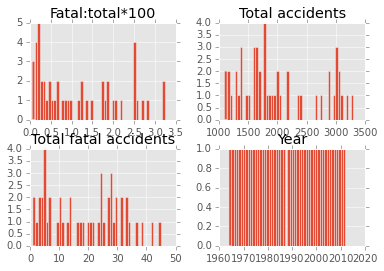

In [18]:
data.hist(bins=50)

Neither of the data columns seem to be parametric.

Total accidents skewtest: teststat =  1.628; pvalue = 0.1036
Total accidents kurtosis: teststat = -2.564; pvalue = 0.0103
Total accidents normaltest: teststat =  9.224; pvalue = 0.0099


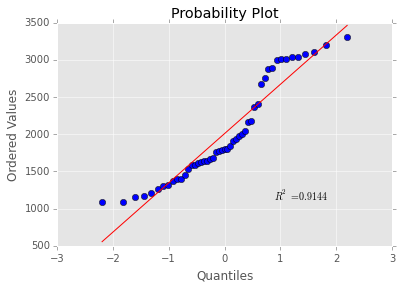

In [26]:
import scipy.stats as stats
import pylab
print('Total accidents skewtest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.skewtest(data['Total accidents']))
# => +1.6 = highly skewed to the left (+-0.5 = normal)
print('Total accidents kurtosis: teststat = %6.3f; pvalue = %6.4f' % sc.stats.kurtosistest(data['Total accidents']))
# => -2.6 = highly flatter than normal (0 = normal)(-3 = completely flat)
print('Total accidents normaltest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.normaltest(data['Total accidents']))
# => skew & kurtosis tests combined, not normal if p is significant 

stats.probplot(data['Total accidents'], dist="norm", plot=pylab)
pylab.show()

Total accidents are non-parametric.

Total fatal accidents skewtest: teststat =  0.501; pvalue = 0.6166
Total fatal accidents kurtosis: teststat = -2.878; pvalue = 0.0040
Total fatal accidents normaltest: teststat =  8.536; pvalue = 0.0140


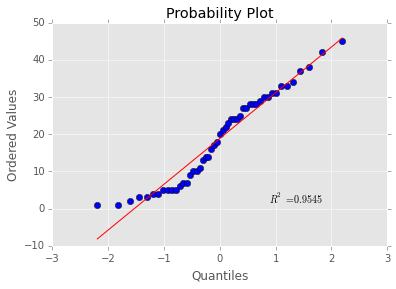

In [27]:
print('Total fatal accidents skewtest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.skewtest(data['Total fatal accidents']))
print('Total fatal accidents kurtosis: teststat = %6.3f; pvalue = %6.4f' % sc.stats.kurtosistest(data['Total fatal accidents']))
print('Total fatal accidents normaltest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.normaltest(data['Total fatal accidents']))

stats.probplot(data['Total fatal accidents'], dist="norm", plot=pylab)
pylab.show()

Total fatal accidents are non-parametric.

Year skewtest: teststat =  1.033; pvalue = 0.3016
Year kurtosis: teststat = -3.384; pvalue = 0.0007
Year normaltest: teststat = 12.521; pvalue = 0.0019


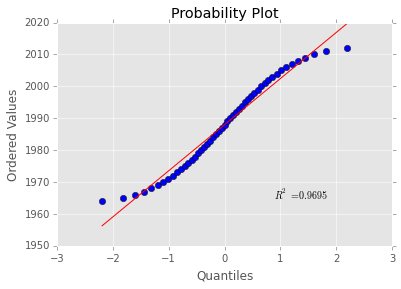

In [28]:
print('Year skewtest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.skewtest(data['Year']))
print('Year kurtosis: teststat = %6.3f; pvalue = %6.4f' % sc.stats.kurtosistest(data['Year']))
print('Year normaltest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.normaltest(data['Year']))

stats.probplot(data['Year'], dist="norm", plot=pylab)
pylab.show()

Year data are non-parametric (obviously; this is a good check).

<h4><strong>B. Are the changes over time (statistically significantly) correlated?</strong></h4><br>
<em>Use non-parametric Spearmen's correlation text, not parametric Pearson's correlation test.</em>

In [30]:
cor1 = stats.spearmanr(data['Total accidents'], data['Year'])
print('Total accidents vs. Year: {0}'.format(cor1))

Total accidents vs. Year: SpearmanrResult(correlation=0.71051020408163268, pvalue=1.0728356668453887e-08)


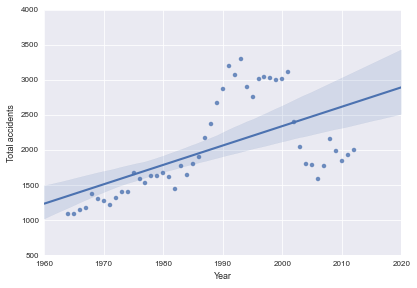

In [34]:
sns.set()
sns.set_context("paper") # not talk, poster, notebook
sns.regplot(data['Year'], data['Total accidents'])

The variables are significantly correlated. The relationship is positive.<br>
The number of total accidents in Iceland has significantly increased over time.

In [36]:
cor2 = stats.spearmanr(data['Total fatal accidents'], data['Year'])
print('Total fatal accidents vs. Year: {0}'.format(cor2))

Total fatal accidents vs. Year: SpearmanrResult(correlation=-0.88486696760430417, pvalue=3.3233360013481958e-17)


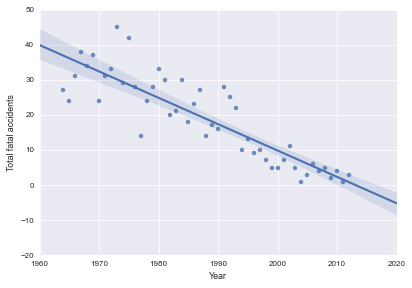

In [37]:
sns.set()
sns.set_context("paper") # not talk, poster, notebook
sns.regplot(data['Year'], data['Total fatal accidents'])

The variables are significantly correlated. The relationship is negative.<br>
The number of total fatal accidents in Iceland has significantly decreased over time.

In [38]:
cor3 = stats.spearmanr(data['Total fatal accidents'], data['Total accidents'])
print('Total fatal accidents vs. Total accidents: {0}'.format(cor3))

Total fatal accidents vs. Total accidents: SpearmanrResult(correlation=-0.54161149341333203, pvalue=5.8481258557149159e-05)


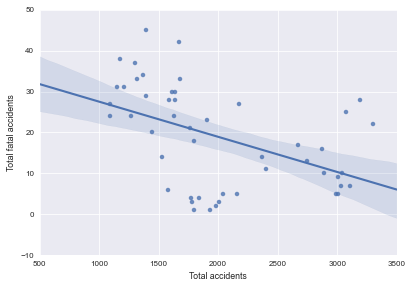

In [39]:
sns.set()
sns.set_context("paper") # not talk, poster, notebook
sns.regplot(data['Total accidents'], data['Total fatal accidents'])

The variables are significantly correlated. The relationship is negative.<br>
The fewer number of total accidents per year, the fewer number of total fatal accidents per year (makes sense).

<h3><strong>Answers/Findings:</strong></h3><br>
1. Has the number of total accidents in Iceland changed over time?<br>
Yes, the number of total accidents in Iceland has significantly increased over time.<br>
<br>
2. Has the number of total fatal accidents in Iceland changed over time?<br>
Yes, the number of total fatal accidents in Iceland has significantly decreased over time. In spite of the increased number of total accidents!<br>
<br>
Additionally, there is a negative correlation between the number of total accidents and the number of total fatal accidents. So the fewer number of total accidents per year, the fewer number of total fatal accidents per year (which makes sense).

<h1>Part B.</h1>
<h1>Has Iceland Crossed The (Imaginary) Accident Limits?</h1><br>
We assume that Iceland set (imaginary) limits on the acceptable number of total and total fatal accidents.

In [41]:
# imaginary of acceprable no of fatal accidents
f_limit = 10
# 6th column too plot data above the limit 10
data['Above fatal limit'] =  data['Total fatal accidents'] > f_limit
# imaginary of acceprable no of total accidents
t_limit = 2500
# 7th column too plot data above the limit 2000
data['Above total limit'] =  data['Total accidents'] > t_limit

colour_1 = 'above both limits'
colour_2 = 'above fatal limit'
colour_3 = 'above total limit'
colour_4 = 'passed' 

def my_function(row):
    if (row['Above fatal limit'] == True & row['Above total limit'] == True):
        return colour_1
    if row['Above fatal limit'] == True:
        return colour_2
    if row['Above total limit'] == True:
        return colour_3
    else:
        return colour_4

# make a colmun with 1 of 4 groups
data['Groups'] = data.apply(my_function, axis=1)

In [43]:
# extracts unnecessary columns for scatter matrix 
data3 = data.drop('Above fatal limit', 1)
data4 = data3.drop('Above total limit', 1)
data5 = data4.drop('Fatal:total*100', 1)

# check the data frame
print(data5.head())
print(data5.tail())
print(data5.shape)

   Year  Total accidents  Total fatal accidents             Groups
0  1964             1090                     27  above fatal limit
1  1965             1089                     24  above fatal limit
2  1966             1150                     31  above fatal limit
3  1967             1173                     38  above fatal limit
4  1968             1366                     34  above fatal limit
    Year  Total accidents  Total fatal accidents  Groups
44  2008             2160                      5  passed
45  2009             1980                      2  passed
46  2010             1842                      4  passed
47  2011             1934                      1  passed
48  2012             2004                      3  passed
(49, 4)


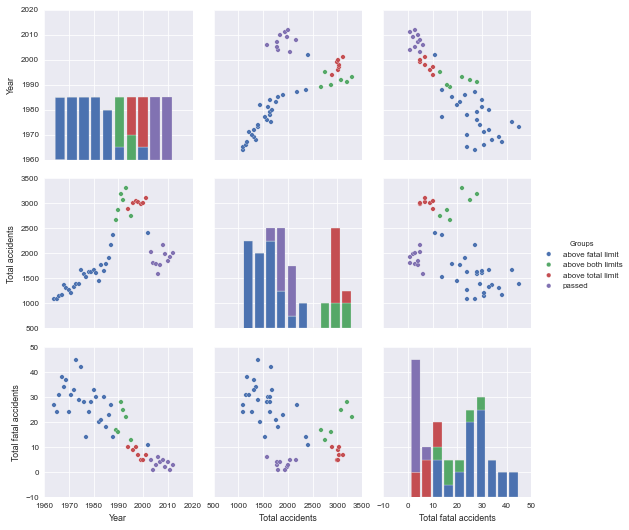

In [44]:
sns.set()
sns.set_context("paper") # not talk, poster, notebook
sns.pairplot(data5, hue="Groups", diag_kind="hist")